In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from 'C:\\Users\\rishi\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Create a validation dataset from the training data
# Scale the data between 0 and 1 by dividing it by 255. as its an unsigned data between 0-255 range
print(X_train.shape)
X_valid = X_train[:5000] / 255
X_train = X_train[5000:] / 255
y_valid = y_train[:5000] / 255
y_train = y_train[5000:] / 255
X_test = X_test / 255
print(X_train.shape)

(60000, 28, 28)
(55000, 28, 28)


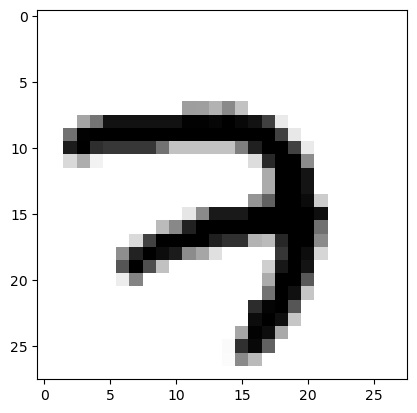

In [5]:
plt.imshow(X_train[0], cmap = 'binary')

<Axes: >

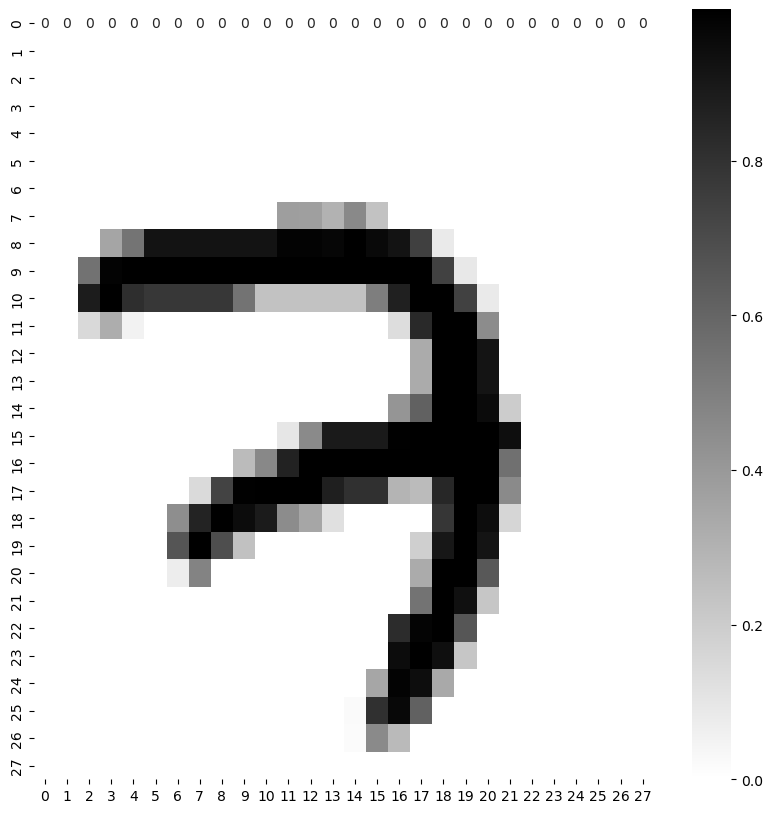

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

### Batch Normalization

In [7]:
layer = tf.keras.layers
Layers = [layer.Flatten(input_shape = [28, 28], name = "inputLayer"), 
          layer.Dense(300, activation = "relu", name = "hiddenLayer1"),
          layer.BatchNormalization(),
          layer.Dense(100, activation = "relu", name = "hiddenLayer2"),
          layer.Dense(10, activation = "softmax", name = "outputLayer")]

model_clf = tf.keras.models.Sequential(Layers)

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### DropOut and Regularization

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape = [28, 28], name = "inputLayer"))
model.add(Dense(units = 64, activation = 'relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Dropout(0.2)) 
model.add(Dense(units = 32, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4)))
model.add(Dense(units = 10, activation = 'softmax'))

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model_clf.summary(), model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,812 (1.02 MB)

 Trainable params: 267,210 (1.02 MB)

 Non-trainable params: 600 (2.34 KB)

 Optimizer params: 2 (12.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

(None, None)

In [9]:
hidden1 = model_clf.layers[1]
print("Hidden layer 1 Name : ", hidden1.name)

weights, biases = hidden1.get_weights()
print("Hidden layer 1 Weights and Biases: ", weights.shape, biases.shape)

Hidden layer 1 Name :  hiddenLayer1
Hidden layer 1 Weights and Biases:  (784, 300) (300,)


In [10]:
Loss_function = "sparse_categorical_crossentropy"
Optimizer = "SGD"
Metrics = ["accuracy"]

model_clf.compile(loss = Loss_function, optimizer = Optimizer, metrics = Metrics)

In [11]:
Epochs = 30
Validation_Set = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = Epochs, validation_data = Validation_Set, batch_size = 32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0949 - loss: 0.0959 - val_accuracy: 0.0958 - val_loss: 0.0010
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0981 - loss: 0.0011 - val_accuracy: 0.0958 - val_loss: 4.9225e-04
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0995 - loss: 5.9378e-04 - val_accuracy: 0.0958 - val_loss: 3.0907e-04
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0981 - loss: 4.0045e-04 - val_accuracy: 0.0958 - val_loss: 2.2301e-04
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0994 - loss: 2.9489e-04 - val_accuracy: 0.0958 - val_loss: 1.7708e-04
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3936e-04 - val_accuracy: 0.0958 - val_loss: 1.4495e-04
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0980 - loss: 2.0342e-04 - val_accuracy: 0.0958 - val_loss: 1.1902e-04
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3

In [16]:
x_new = X_test[:3]
actual = y_test[:3]
actual, y_test

(array([7, 2, 1], dtype=uint8), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

<Axes: >

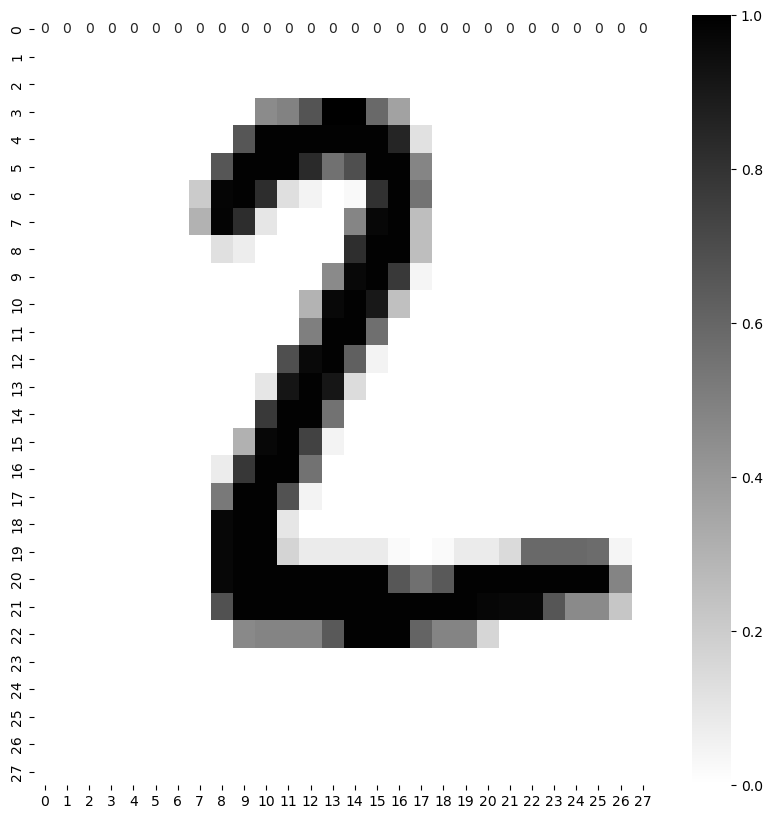

In [13]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_test[1], annot=True, cmap='binary')

In [14]:
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)